In [ ]:
%pip install pandas

In [2]:
# Ver los archivos disponibles en el dataset
import os

dataset_path = r"C:\Users\AliciaSanJuliánFerna\Documents\recursos\sap_sam_2022\sap_sam_2022\models"

# Listar archivos en la carpeta
files = os.listdir(dataset_path)

print("Archivos disponibles:", files)

Archivos disponibles: ['0.csv', '10000.csv', '100000.csv', '1000000.csv', '1010000.csv', '1020000.csv', '110000.csv', '120000.csv', '130000.csv', '140000.csv', '150000.csv', '160000.csv', '170000.csv', '180000.csv', '190000.csv', '20000.csv', '200000.csv', '210000.csv', '220000.csv', '230000.csv', '240000.csv', '250000.csv', '260000.csv', '270000.csv', '280000.csv', '290000.csv', '30000.csv', '300000.csv', '310000.csv', '320000.csv', '330000.csv', '340000.csv', '350000.csv', '360000.csv', '370000.csv', '380000.csv', '390000.csv', '40000.csv', '400000.csv', '410000.csv', '420000.csv', '430000.csv', '440000.csv', '450000.csv', '460000.csv', '470000.csv', '480000.csv', '490000.csv', '50000.csv', '500000.csv', '510000.csv', '520000.csv', '530000.csv', '540000.csv', '550000.csv', '560000.csv', '570000.csv', '580000.csv', '590000.csv', '60000.csv', '600000.csv', '610000.csv', '620000.csv', '630000.csv', '640000.csv', '650000.csv', '660000.csv', '670000.csv', '680000.csv', '690000.csv', '7000

# **Filtrado**

Escojo un csv y me quedo con ese

In [7]:
import pandas as pd
import os

# Ruta del dataset
dataset_path = r"C:\Users\AliciaSanJuliánFerna\Documents\recursos\sap_sam_2022\sap_sam_2022\models"

# Archivo CSV a cargar (prueba con el primero)
csv_file = "100000.csv"

# Cargar el CSV
df = pd.read_csv(os.path.join(dataset_path, csv_file))

# Mostrar las primeras filas
print(df.head())

                        Revision ID                          Model ID  \
0  937e393c413a416c910cbc4b939060db  39ba0a3e249c461dacd98f9c8c0cf4ef   
1  b1882bdeeb0e4f178e92456fe02856b6  39ba0bff3cd24967a3eb35e16ce55dfa   
2  3eff4dc6b8f849f68b9090df01e609aa  39ba12565ec54a4f829c338dad920134   
3  74a40f86f0e24e68821580fa3ebe4436  39ba14ce80dc4b108e8c27d1450df14e   
4  3da15c6aef3742458dddfa70c847b331  39ba1dcb1ffe487e8ca36f9a672f4444   

                    Organization ID             Datetime  \
0  00e9194c0a5e405cba2464a88e7e8887  2018-05-29 01:42:03   
1  6183f7ff20d246a38afabd97e735888e  2019-04-15 01:32:59   
2  9535c35a498d46c0afc899878b3bcf7b  2019-10-04 02:14:45   
3  59f31aef8df7464cb350c8607427a65b  2021-05-22 06:34:03   
4  93ea072bfacb44068b10cddc8c323f4a  2018-10-25 15:23:19   

                                          Model JSON Description  \
0  {"resourceId": "canvas", "properties": {"descr...         NaN   
1  {"resourceId": "canvas", "formats": {}, "ssext...         NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Revision ID      10000 non-null  object
 1   Model ID         10000 non-null  object
 2   Organization ID  10000 non-null  object
 3   Datetime         10000 non-null  object
 4   Model JSON       10000 non-null  object
 5   Description      6 non-null      object
 6   Name             10000 non-null  object
 7   Type             449 non-null    object
 8   Namespace        10000 non-null  object
dtypes: object(9)
memory usage: 703.3+ KB


## Filtro los elementos que estén en BPMN 2.0

In [ ]:
%pip install matplotlib

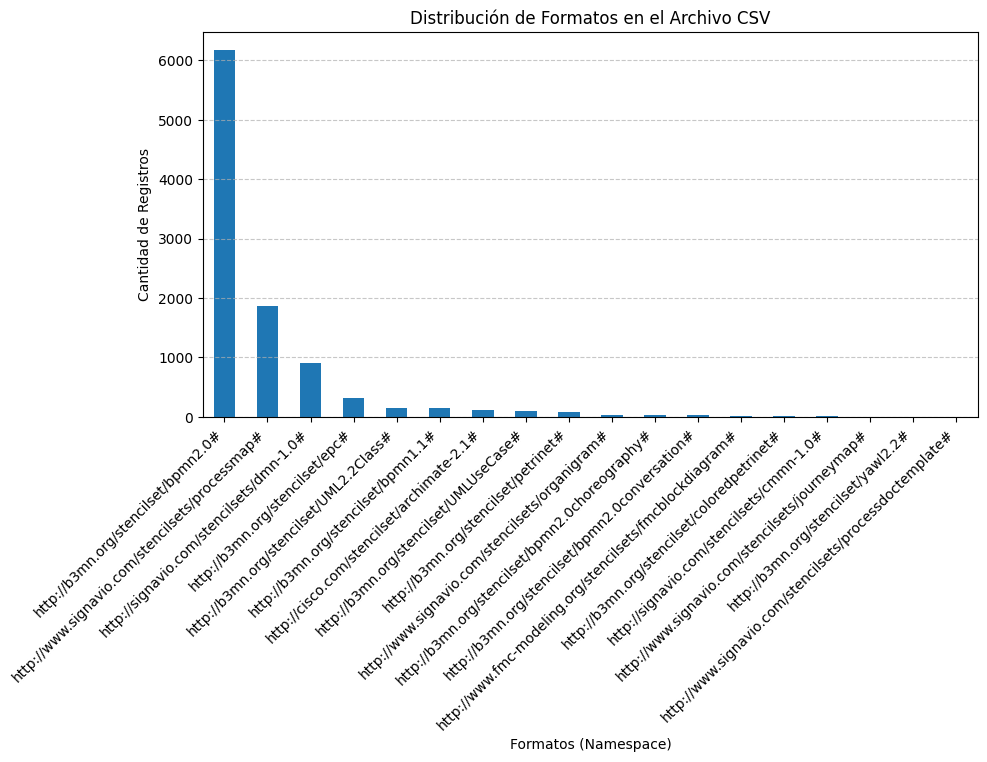

In [11]:
import pandas as pd
import matplotlib.pyplot as plt



# Contar la cantidad de registros por formato (Namespace)
format_counts = df["Namespace"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
format_counts.plot(kind="bar")
plt.xlabel("Formatos (Namespace)")
plt.ylabel("Cantidad de Registros")
plt.title("Distribución de Formatos en el Archivo CSV")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [12]:
# Filtrar solo modelos BPMN 2.0
df_bpmn = df[df["Namespace"] == "http://b3mn.org/stencilset/bpmn2.0#"]

# Mostrar cuántos modelos BPMN hay en este archivo CSV
print(f"Modelos BPMN en {csv_file}: {len(df_bpmn)}")

# Ver las primeras filas
df_bpmn.head()


Modelos BPMN en 100000.csv: 6167


,Revision ID,Model ID,Organization ID,Datetime,Model JSON,Description,Name,Type,Namespace
1,b1882bdeeb0e4f178e92456fe02856b6,39ba0bff3cd24967a3eb35e16ce55dfa,6183f7ff20d246a38afabd97e735888e,2019-04-15 01:32:59,"{""resourceId"": ""canvas"", ""formats"": {}, ""ssext...",NaN,Receipt of Goods,NaN,http://b3mn.org/stencilset/bpmn2.0#
6,27bec743f0fa4d94a4e125a11d12876b,39ba28a297414fdfa4bc47192954f091,9fa5c4b022714032b1343aa6e69b7181,2021-06-10 23:33:40,"{""resourceId"": ""canvas"", ""properties"": {""name""...",NaN,11a,NaN,http://b3mn.org/stencilset/bpmn2.0#
7,ad97049bd6e8426b98b77b6b1109423d,39ba43e10cd4485888e3f1e14f12b3c0,359f2e98c56444b287a7818dc1a531b2,2018-01-03 20:02:55,"{""resourceId"": ""canvas"", ""formats"": {}, ""ssext...",NaN,Receipt of Goods,NaN,http://b3mn.org/stencilset/bpmn2.0#
8,e9a137222747419f9940623c579f7475,39ba49ce53a549949ddd1e1f6fb93c52,2a3c19bd450548988e3907268dd5eaaf,2019-03-27 15:19:57,"{""resourceId"": ""canvas"", ""properties"": {""name""...",NaN,Gestion d'une commande v1,NaN,http://b3mn.org/stencilset/bpmn2.0#
9,4eb2c1280221471e822f70dd48215b7c,39ba4c7bc8ef47668b8ee5f0992cb3ad,7973fe1261884a9bac69a1165c1a7b0c,2020-09-08 16:13:09,"{""resourceId"": ""canvas"", ""properties"": {""name""...",NaN,Fig 3.16_Jane Doe,NaN,http://b3mn.org/stencilset/bpmn2.0#


## Filtro por nº de elementos

In [18]:
import json

# Contar los elementos dentro de cada modelo
df_bpmn.loc[:, "Num_Elements"] = df_bpmn["Model JSON"].apply(lambda x: len(json.loads(x).get("childShapes", [])))

# Mostrar cuántos elementos tiene cada modelo
df_bpmn[["Model ID", "Num_Elements"]].head()

,Model ID,Num_Elements
1,39ba0bff3cd24967a3eb35e16ce55dfa,21
6,39ba28a297414fdfa4bc47192954f091,2
7,39ba43e10cd4485888e3f1e14f12b3c0,21
8,39ba49ce53a549949ddd1e1f6fb93c52,14
9,39ba4c7bc8ef47668b8ee5f0992cb3ad,61


In [19]:
import json

# Contar los elementos dentro de cada modelo
df_bpmn.loc[:, "Num_Elements"] = df_bpmn["Model JSON"].apply(lambda x: len(json.loads(x).get("childShapes", [])))

# Mostrar cuántos elementos tiene cada modelo
df_bpmn[["Model ID", "Num_Elements"]].head()
# Calcular la media de elementos por modelo
mean_elements = df_bpmn["Num_Elements"].mean()
print(f"Media de elementos por modelo: {mean_elements}")

Media de elementos por modelo: 26.316685584562997


In [20]:
df_bpmn = df_bpmn[df_bpmn["Num_Elements"] > 25
                  ]

print(f"Modelos con más de 25 elementos: {len(df_bpmn)}")


Modelos con más de 25 elementos: 2134


In [21]:
def contains_required_elements(model_json):
    """Verifica si el modelo tiene eventos de inicio, tareas y eventos de fin."""
    elements = json.loads(model_json).get("childShapes", [])
    
    has_start = any(e["stencil"]["id"] == "StartNoneEvent" for e in elements)
    has_task = any(e["stencil"]["id"] == "Task" for e in elements)
    has_end = any(e["stencil"]["id"] == "EndNoneEvent" for e in elements)
    
    return has_start and has_task and has_end

# Filtrar modelos que contienen los tres tipos de elementos
df_bpmn = df_bpmn[df_bpmn["Model JSON"].apply(contains_required_elements)]

print(f"Modelos finales con los tres elementos clave: {len(df_bpmn)}")


Modelos finales con los tres elementos clave: 273


## Filtrado por nombre

In [33]:
import json

# Función para extraer el nombre del modelo
def extract_name(model_json):
    try:
        data = json.loads(model_json)  # Convertir JSON a diccionario
        return data.get("properties", {}).get("name", None)  # Extraer nombre
    except:
        return None  # Si hay error, devolver None

# Aplicar la función a cada fila
df_bpmn["Model_Name"] = df_bpmn["Model JSON"].apply(extract_name)

In [34]:
# Contar cuántos modelos tienen nombre
num_named_models = df_bpmn["Model_Name"].notna().sum()
print(f"Modelos con nombre: {num_named_models}")

# Contar nombres únicos
unique_names = df_bpmn["Model_Name"].nunique()
print(f"Nombres distintos en los modelos: {unique_names}")

Modelos con nombre: 179
Nombres distintos en los modelos: 7


In [23]:
# Función para extraer el nombre del modelo
def extract_name(model_json):
    try:
        data = json.loads(model_json)  # Convertir JSON a diccionario
        return data.get("properties", {}).get("name", None)  # Extraer nombre
    except:
        return None  # Si hay error, devolver None

# Aplicar la función a cada fila
df_bpmn["Model_Name"] = df_bpmn["Model JSON"].apply(extract_name)

# Contar cuántos modelos tienen nombre
num_named_models = df_bpmn["Model_Name"].notna().sum()
print(f"Modelos con nombre: {num_named_models}")



Modelos con nombre: 228


In [24]:
# Contar nombres únicos
unique_names = df_bpmn["Model_Name"].nunique()
print(f"Nombres distintos en los modelos: {unique_names}")

Nombres distintos en los modelos: 11


In [37]:
# Filtrar modelos que tienen nombre
df_bpmn = df_bpmn[df_bpmn["Model_Name"].notna()]

print(f"Modelos actuales: {len(df_bpmn)}")


Modelos actuales: 179


## Filtrar por fecha

In [29]:
df_bpmn["Datetime"] = pd.to_datetime(df_bpmn["Datetime"])
df_bpmn = df_bpmn[df_bpmn["Datetime"] >= "2018-01-01"]
print(f"Modelos actuales: {len(df_bpmn)}")



Modelos actuales: 188


## Excluir los elementos d eprueba o hechos por estudiantes

In [30]:
keywords_to_exclude = ["example", "test", "sample", "demo","example_processes_bpmn"]
df_bpmn = df_bpmn[~df_bpmn["Name"].str.lower().str.contains('|'.join(keywords_to_exclude), na=False)]
print(f"Modelos actuales: {len(df_bpmn)}")


Modelos actuales: 182


## Filtrado por Idiomas

In [31]:
import json

# Función para extraer el idioma del JSON
def extract_language(model_json):
    try:
        data = json.loads(model_json)  # Convertir JSON en diccionario
        return data.get("properties", {}).get("language", "unknown")  # Obtener el idioma
    except:
        return "unknown"

# Aplicar la función a cada fila
df_bpmn["json_language"] = df_bpmn["Model JSON"].apply(extract_language)

# Contar los idiomas detectados
language_counts_json = df_bpmn["json_language"].value_counts()
print(language_counts_json)


json_language
English    179
unknown      3
Name: count, dtype: int64


In [32]:
df_bpmn = df_bpmn[df_bpmn["json_language"].isin(["English", "Spanish"])]
print(f"Modelos actuales: {len(df_bpmn)}")


Modelos actuales: 179


# **Conversión**

Elegimos un modelo

In [44]:
selected_model = df_bpmn.iloc[0]
print(selected_model)

Revision ID                         815b3035184a4875a7debf609cb9d6f6
Model ID                            39bbf0da504e4622943fd7ae09f8bb16
Organization ID                     fb7faa9b95e74d819ecfdcee90b1b23f
Datetime                                         2020-03-23 02:26:45
Model JSON         {"resourceId": "canvas", "properties": {"name"...
Description                                                      NaN
Name                                                       Week 4 A3
Type                                                             NaN
Namespace                        http://b3mn.org/stencilset/bpmn2.0#
Num_Elements                                                      59
Model_Name                                                          
json_language                                                English
Name: 43, dtype: object


In [45]:
import json

# Extraer los valores del modelo seleccionado
model_json = json.loads(selected_model["Model JSON"])  # Convertir el JSON almacenado en string a diccionario
model_namespace = selected_model["Namespace"]  # Obtener el namespace
model_name = selected_model["Name"]  # Obtener el nombre

# Mostrar los valores
print('================ Namespace:', model_namespace)
print('================ Name:', model_name)

================ Namespace: http://b3mn.org/stencilset/bpmn2.0#
================ Name: Week 4 A3


## Rendering PNG images
Now, we can use the SAP-SAM API to create the diagram in SAP Signavio Process Manager and have it generate the image:

2025-01-31 23:27:16,708 - DEBUG - Starting new HTTPS connection (1): academic.signavio.com:443
2025-01-31 23:27:17,046 - DEBUG - https://academic.signavio.com:443 "POST /p/login HTTP/1.1" 200 None
2025-01-31 23:27:17,057 - DEBUG - Starting new HTTPS connection (1): academic.signavio.com:443
2025-01-31 23:27:17,277 - DEBUG - https://academic.signavio.com:443 "POST /p/login HTTP/1.1" 200 None
2025-01-31 23:27:17,279 - INFO - 📂 Fetching directory metadata from https://academic.signavio.com/p/directory
2025-01-31 23:27:17,284 - DEBUG - Starting new HTTPS connection (1): academic.signavio.com:443
2025-01-31 23:27:17,510 - DEBUG - https://academic.signavio.com:443 "GET /p/directory HTTP/1.1" 200 None
2025-01-31 23:27:17,512 - INFO - 📂 Retrieving directory ID from response...
2025-01-31 23:27:17,513 - DEBUG - 🔍 Directory JSON Response: [{'rel': 'dir', 'href': '/directory/277a7529991547aa891965f9d3a006e3', 'rep': {'allowedMimeTypeRegex': '.*', 'deleted': False, 'visible': True, 'created': '202

📤 JSON Enviado (truncado): {"name": "Week 4 A3", "parent": "/directory/29c430cd29d04608b8d0acc5ed026467", "namespace": "http://b3mn.org/stencilset/bpmn2.0#", "json_xml": "{\"resourceId\": \"canvas\", \"properties\": {\"name\": \"\", \"documentation\": \"\", \"auditing\": \"\", \"monitoring\": \"\", \"flat\": \"\", \"version\": \"\", \"author\": \"\", \"language\": \"English\", \"targetnamespace\": \"http://www.signavio.com\", \"expressionlanguage\": \"http://www.w3.org/TR/XPath\", \"typelanguage\": \"http://www.w3.org/200


2025-01-31 23:27:18,148 - DEBUG - https://academic.signavio.com:443 "POST /p/model HTTP/1.1" 200 None
2025-01-31 23:27:18,151 - DEBUG - 📥 Respuesta HTTP 200: {"rel":"mod","href":"/model/27caaf76e7ab45d492b12441a4be81a8","rep":{"parent":"/directory/29c430cd29d04608b8d0acc5ed026467","formats":{},"granted_revision_user":"","isLicensedStencilSet":true,"granted_revision_user_name":"","description":"","type":"Business Process Diagram (BPMN 2.0)","sri_revision":"sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:model/27caaf76e7ab45d492b12441a4be81a8:revision/e9c162fae4784f4d873e230981574601","sri_path":"sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:directory/277a7529991547aa891965f9d3a006e3;sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:directory/29c430cd29d04608b8d0acc5ed026467","isDeployed":false,"granted_revision":"","rev":1,"created":"2025-01-31 22:27:17 +0000","author":"/user/612c0e31d3a2453caab02785f1c52aec","granted_revision_date":"","sri":"sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:model/27caaf

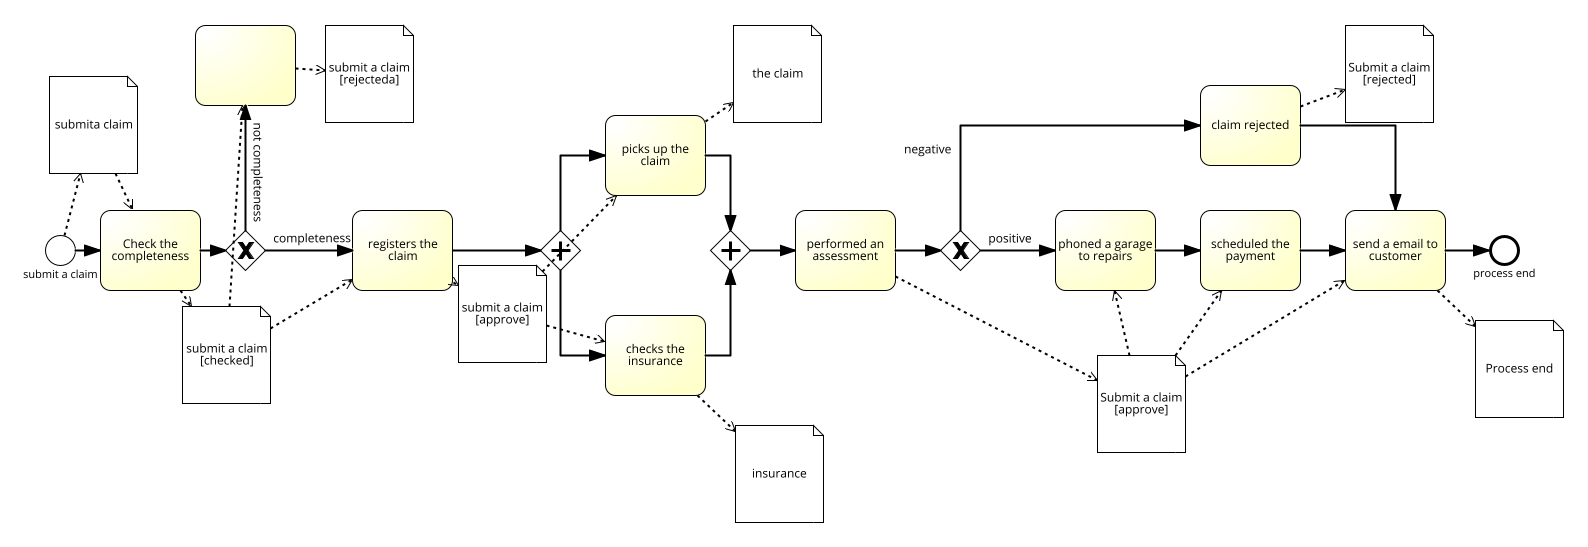

In [46]:
from sapsam.RepresentationGenerator import RepresentationGenerator
from IPython.display import Image, display

gen = RepresentationGenerator()
image_request = gen.generate_image(model_name, model_json, model_namespace, deletes=False)
display(Image(image_request))

## Generating XML representation
We can generate XML representations for BPMN and DMN in an analogous manner.

In [43]:
import xml.etree.ElementTree as ET
import io
import os

# Generar el XML
xml_request = io.StringIO(gen.generate_bpmn_xml(model_name, model_json, model_namespace).decode("utf-8"))
xml_tree = ET.parse(xml_request)
root = xml_tree.getroot()

# Definir la ruta del archivo
xml_file_path = os.path.join("xml", f"{model_name}.bpmn")

# Guardar el XML en el archivo
xml_tree.write(xml_file_path, encoding="utf-8", xml_declaration=True)


2025-01-31 23:24:19,374 - DEBUG - Starting new HTTPS connection (1): academic.signavio.com:443
2025-01-31 23:24:19,683 - DEBUG - https://academic.signavio.com:443 "POST /p/login HTTP/1.1" 200 None
2025-01-31 23:24:19,685 - DEBUG - Starting new HTTPS connection (1): academic.signavio.com:443
2025-01-31 23:24:19,882 - DEBUG - https://academic.signavio.com:443 "POST /p/login HTTP/1.1" 200 None
2025-01-31 23:24:19,882 - INFO - 📂 Fetching directory metadata from https://academic.signavio.com/p/directory
2025-01-31 23:24:19,888 - DEBUG - Starting new HTTPS connection (1): academic.signavio.com:443
2025-01-31 23:24:20,064 - DEBUG - https://academic.signavio.com:443 "GET /p/directory HTTP/1.1" 200 None
2025-01-31 23:24:20,064 - INFO - 📂 Retrieving directory ID from response...
2025-01-31 23:24:20,064 - DEBUG - 🔍 Directory JSON Response: [{'rel': 'dir', 'href': '/directory/277a7529991547aa891965f9d3a006e3', 'rep': {'allowedMimeTypeRegex': '.*', 'deleted': False, 'visible': True, 'created': '202

📤 JSON Enviado (truncado): {"name": "FarmInvest", "parent": "/directory/29c430cd29d04608b8d0acc5ed026467", "namespace": "http://b3mn.org/stencilset/bpmn2.0#", "json_xml": "{\"resourceId\": \"canvas\", \"properties\": {\"name\": \"\", \"documentation\": \"\", \"auditing\": \"\", \"monitoring\": \"\", \"flat\": \"\", \"version\": \"\", \"author\": \"\", \"language\": \"English\", \"targetnamespace\": \"http://www.signavio.com\", \"expressionlanguage\": \"http://www.w3.org/TR/XPath\", \"typelanguage\": \"http://www.w3.org/20


2025-01-31 23:24:20,607 - DEBUG - https://academic.signavio.com:443 "POST /p/model HTTP/1.1" 200 None
2025-01-31 23:24:20,613 - DEBUG - 📥 Respuesta HTTP 200: {"rel":"mod","href":"/model/391c55c13d5a4045b869a269f35e3562","rep":{"parent":"/directory/29c430cd29d04608b8d0acc5ed026467","formats":{},"granted_revision_user":"","isLicensedStencilSet":true,"granted_revision_user_name":"","description":"","type":"Business Process Diagram (BPMN 2.0)","sri_revision":"sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:model/391c55c13d5a4045b869a269f35e3562:revision/68a5d4a6b2b04705866b09a84c1a1857","sri_path":"sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:directory/277a7529991547aa891965f9d3a006e3;sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:directory/29c430cd29d04608b8d0acc5ed026467","isDeployed":false,"granted_revision":"","rev":1,"created":"2025-01-31 22:24:20 +0000","author":"/user/612c0e31d3a2453caab02785f1c52aec","granted_revision_date":"","sri":"sri:eu:89d773ae5da1413d90c54cf134fe90b2:spm:model/391c55

---

# **Pruebas**

In [25]:
import json

# Extraer el primer modelo BPMN en JSON
#first_model_json = df_bpmn.iloc[10]["Model JSON"]
modelo = df_bpmn.iloc[0]["Model JSON"]
# Convertir de string a JSON
json_impreso = json.loads(modelo)

# Mostrar la estructura del modelo
print(json.dumps(json_impreso, indent=4))


{
    "resourceId": "canvas",
    "properties": {
        "name": "",
        "documentation": "",
        "auditing": "",
        "monitoring": "",
        "flat": "",
        "version": "",
        "author": "",
        "language": "English",
        "namespaces": "",
        "targetnamespace": "http://www.signavio.com",
        "expressionlanguage": "http://www.w3.org/TR/XPath",
        "typelanguage": "http://www.w3.org/2001/XMLSchema",
        "creationdate": "",
        "modificationdate": "",
        "itemdefinitions": "",
        "signals": "",
        "exporter": "",
        "exporterversion": "",
        "defaultprocessname": "",
        "properties": "",
        "properties2": "",
        "datainputs": "",
        "dataoutputs": "",
        "inputsets": "",
        "outputsets": "",
        "datainputset": "",
        "dataoutputset": "",
        "processtype": "None",
        "isclosed": false,
        "isexecutable": false,
        "processid": "",
        "orientation": "

In [26]:
# Guardar en un archivo JSON
json_impreso
with open("modelo.json", "w") as f:
    json.dump(json_impreso, f, indent=4)

print("Modelo BPMN guardado como 'bpmn_example.json'")


Modelo BPMN guardado como 'bpmn_example.json'
